# Chronicle Urban Flood Database Analysis

This notebook provides a comprehensive analysis of the Chronicle urban flood dataset, containing over 880,000 flood events worldwide from 2000-2025.

## Dataset Overview
- **Source**: Chronicle preliminary dataset (HUJI)
- **Records**: 882,972 flood events
- **Time Period**: 2000-2025
- **Geographic Coverage**: Global
- **Data Format**: CSV with WKT geometry

## 1. Import Libraries and Setup

In [1]:
# Core data analysis libraries
import pandas as pd
import numpy as np
from datetime import datetime
import math

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Geospatial libraries
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely import wkt
from matplotlib.patches import Polygon as MplPolygon, Rectangle, Circle
import folium
from folium import plugins

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 2. Data Loading and Initial Exploration

In [2]:
# Load the Chronicle dataset
file_path = r"D:\Development\RESEARCH\urban_flood_database\chronicle\chronicle_preliminary_huji.csv"

try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully: {df.shape[0]:,} records, {df.shape[1]} columns")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully: 882,972 records, 8 columns
Memory usage: 490.17 MB


In [3]:
# Dataset structure overview
print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:")
df.info()

Dataset Information:
Shape: (882972, 8)

Columns: ['Unnamed: 0', 'uuid', 'area_km2', 'version', 'start_time', 'end_time', 'duration_days', 'geometry_wkt']

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882972 entries, 0 to 882971
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     882972 non-null  int64  
 1   uuid           882972 non-null  object 
 2   area_km2       882972 non-null  float64
 3   version        882972 non-null  object 
 4   start_time     882972 non-null  float64
 5   end_time       882972 non-null  float64
 6   duration_days  882972 non-null  int64  
 7   geometry_wkt   882972 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 53.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882972 entries, 0 to 882971
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unna

In [4]:
# Sample records
print("Sample records:")
display(df.head())

print(f"\nBasic statistics:")
display(df.describe())

Sample records:


,Unnamed: 0,uuid,area_km2,version,start_time,end_time,duration_days,geometry_wkt
0,0,93e48341dbaa4be29a38b856d94206c5,191.436317,v3.1,946684800.0,946684800.0,1,"POLYGON ((-7.6844751 33.499789, -7.5516781 33...."
1,1,939149831ea34c3e94712cc42c17c46a,14.208894,v3.1,946684800.0,946684800.0,1,"POLYGON ((-7.9863739 29.745153, -7.9965878 29...."
2,2,931831f75479454cb3938811e64ce882,28.562733,v3.1,946684800.0,946684800.0,1,"POLYGON ((-98.97432499999999 19.337026, -98.93..."
3,3,91bc68dde43646289c9e75b7d59e1711,108.562378,v3.1,946684800.0,946684800.0,1,"POLYGON ((30.936502 -29.872152, 30.928104 -29...."
4,4,8b849511de80423f98918f55af323e7e,0.104375,v3.1,946684800.0,946684800.0,1,"POLYGON ((16.547385 38.687964, 16.549982 38.68..."



Basic statistics:


,Unnamed: 0,area_km2,start_time,end_time,duration_days
count,882972.000000,882972.000000,8.829720e+05,8.829720e+05,882972.000000
mean,441485.500000,226.346070,1.586577e+09,1.586640e+09,1.719860
std,254892.205282,663.366813,1.452755e+08,1.452781e+08,1.136585
min,0.000000,0.000007,9.466848e+08,9.466848e+08,1.000000
25%,220742.750000,2.501578,1.504829e+09,1.504915e+09,1.000000
50%,441485.500000,12.233674,1.623629e+09,1.623715e+09,1.000000
75%,662228.250000,71.604724,1.704672e+09,1.704758e+09,2.000000
max,882971.000000,4998.975299,1.761437e+09,1.761437e+09,7.000000


## 3. Data Quality Assessment

In [5]:
# Data completeness and quality checks
print("Data Quality Assessment:")
print(f"\nMissing values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print(f"\nDuplicate records: {df.duplicated().sum():,}")
print(f"Unique UUIDs: {df['uuid'].nunique():,} (should match total records)")

print(f"\nVersion distribution:")
print(df['version'].value_counts())

print(f"\nGeometry types:")
geometry_types = df['geometry_wkt'].str.extract(r'^(\w+)')[0].value_counts()
print(geometry_types)

Data Quality Assessment:

Missing values:
Series([], dtype: int64)
Series([], dtype: int64)

Duplicate records: 0

Duplicate records: 0
Unique UUIDs: 882,972 (should match total records)

Version distribution:
v3.1    882972
Name: version, dtype: int64

Geometry types:
Unique UUIDs: 882,972 (should match total records)

Version distribution:
v3.1    882972
Name: version, dtype: int64

Geometry types:
POLYGON         814716
MULTIPOLYGON     68256
Name: 0, dtype: int64
POLYGON         814716
MULTIPOLYGON     68256
Name: 0, dtype: int64


## 4. Temporal Analysis

In [6]:
# Convert timestamps and analyze temporal patterns
print("Temporal Analysis:")

# Time range analysis
min_start = datetime.fromtimestamp(df['start_time'].min())
max_start = datetime.fromtimestamp(df['start_time'].max())
min_end = datetime.fromtimestamp(df['end_time'].min())
max_end = datetime.fromtimestamp(df['end_time'].max())

print(f"\nTime coverage:")
print(f"Start times: {min_start.strftime('%Y-%m-%d')} to {max_start.strftime('%Y-%m-%d')}")
print(f"End times: {min_end.strftime('%Y-%m-%d')} to {max_end.strftime('%Y-%m-%d')}")

# Duration analysis
duration_stats = df['duration_days'].describe()
print(f"\nDuration statistics (days):")
print(f"Range: {df['duration_days'].min()} to {df['duration_days'].max()}")
print(f"Mean: {duration_stats['mean']:.2f}, Median: {duration_stats['50%']:.2f}")

print(f"\nMost common durations:")
print(df['duration_days'].value_counts().head())

Temporal Analysis:

Time coverage:
Start times: 2000-01-01 to 2025-10-26
End times: 2000-01-01 to 2025-10-26

Duration statistics (days):
Range: 1 to 7
Mean: 1.72, Median: 1.00

Most common durations:
1    516380
2    223153
3     74979
4     34426
5     17409
Name: duration_days, dtype: int64


## 5. Spatial Analysis

In [7]:
# Flood area analysis
print("Flood Area Analysis:")

area_stats = df['area_km2'].describe()
print(f"\nArea statistics (km²):")
print(f"Range: {df['area_km2'].min():.6f} to {df['area_km2'].max():.2f}")
print(f"Mean: {area_stats['mean']:.2f}, Median: {area_stats['50%']:.2f}")

# Area percentiles
percentiles = [25, 50, 75, 90, 95, 99]
print(f"\nArea percentiles (km²):")
for p in percentiles:
    value = np.percentile(df['area_km2'], p)
    print(f"{p}th percentile: {value:.4f}")

Flood Area Analysis:

Area statistics (km²):
Range: 0.000007 to 4998.98
Mean: 226.35, Median: 12.23

Area percentiles (km²):
25th percentile: 2.5016
50th percentile: 12.2337

Area statistics (km²):
Range: 0.000007 to 4998.98
Mean: 226.35, Median: 12.23

Area percentiles (km²):
25th percentile: 2.5016
50th percentile: 12.2337
75th percentile: 71.6047
90th percentile: 543.4847
95th percentile: 1495.0004
99th percentile: 3778.8257
75th percentile: 71.6047
90th percentile: 543.4847
95th percentile: 1495.0004
99th percentile: 3778.8257


## 6. Statistical Visualizations

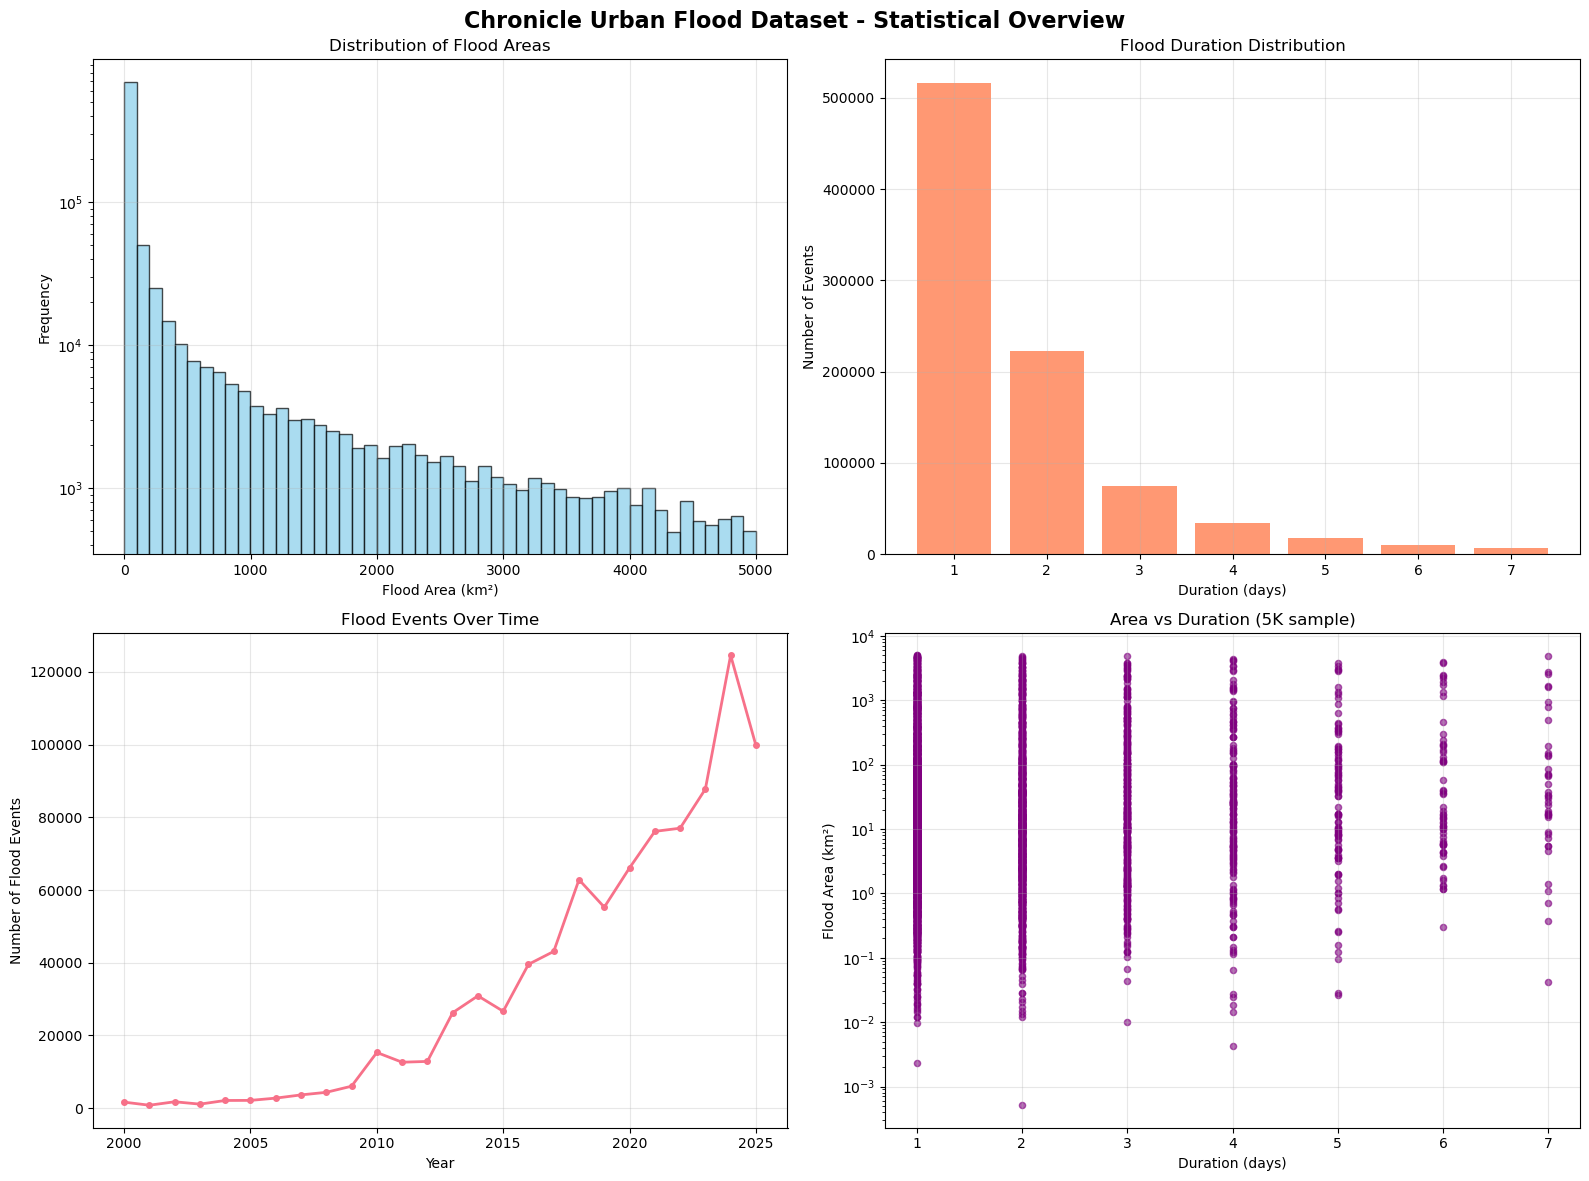

Temporal coverage: 2000 - 2025
Peak year: 2024 (124,580 events)
Most common duration: 1 day(s) (516,380 events)


In [8]:
# Create comprehensive statistical visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Chronicle Urban Flood Dataset - Statistical Overview', fontsize=16, fontweight='bold')

# 1. Flood area distribution (log scale)
axes[0,0].hist(df['area_km2'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Flood Area (km²)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Flood Areas')
axes[0,0].set_yscale('log')
axes[0,0].grid(True, alpha=0.3)

# 2. Duration distribution
duration_counts = df['duration_days'].value_counts().sort_index()
axes[0,1].bar(duration_counts.index, duration_counts.values, color='coral', alpha=0.8)
axes[0,1].set_xlabel('Duration (days)')
axes[0,1].set_ylabel('Number of Events')
axes[0,1].set_title('Flood Duration Distribution')
axes[0,1].grid(True, alpha=0.3)

# 3. Temporal distribution by year
df_temp = df.copy()
df_temp['year'] = pd.to_datetime(df_temp['start_time'], unit='s').dt.year
yearly_counts = df_temp['year'].value_counts().sort_index()

axes[1,0].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=4)
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Number of Flood Events')
axes[1,0].set_title('Flood Events Over Time')
axes[1,0].grid(True, alpha=0.3)

# 4. Area vs Duration relationship
sample_df = df.sample(n=5000, random_state=42)
scatter = axes[1,1].scatter(sample_df['duration_days'], sample_df['area_km2'], 
                           alpha=0.6, s=20, c='purple')
axes[1,1].set_xlabel('Duration (days)')
axes[1,1].set_ylabel('Flood Area (km²)')
axes[1,1].set_title('Area vs Duration (5K sample)')
axes[1,1].set_yscale('log')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"Temporal coverage: {yearly_counts.index.min()} - {yearly_counts.index.max()}")
print(f"Peak year: {yearly_counts.idxmax()} ({yearly_counts.max():,} events)")
print(f"Most common duration: {duration_counts.idxmax()} day(s) ({duration_counts.max():,} events)")

## 7. Geographic Distribution Analysis

In [9]:
# Extract coordinates from geometry for geographic analysis
def extract_centroid_coordinates(geometry_wkt_string):
    """Extract centroid coordinates from WKT geometry string."""
    try:
        if geometry_wkt_string.startswith(('POLYGON', 'MULTIPOLYGON')):
            geom = wkt.loads(geometry_wkt_string)
            centroid = geom.centroid
            return centroid.y, centroid.x  # lat, lon
    except Exception:
        return None, None
    return None, None

# Process sample for geographic visualization
sample_size = 3000
sample_events = df.sample(n=sample_size, random_state=42)

print(f"Processing {sample_size} events for geographic analysis...")

coordinates = []
areas = []
durations = []

for idx, row in sample_events.iterrows():
    lat, lon = extract_centroid_coordinates(row['geometry_wkt'])
    if lat is not None and lon is not None:
        coordinates.append([lon, lat])  # lon, lat order
        areas.append(row['area_km2'])
        durations.append(row['duration_days'])

coordinates = np.array(coordinates)
lons = coordinates[:, 0]
lats = coordinates[:, 1]
areas_array = np.array(areas)

print(f"Successfully processed {len(coordinates)} events")

Processing 3000 events for geographic analysis...
Successfully processed 3000 events
Successfully processed 3000 events


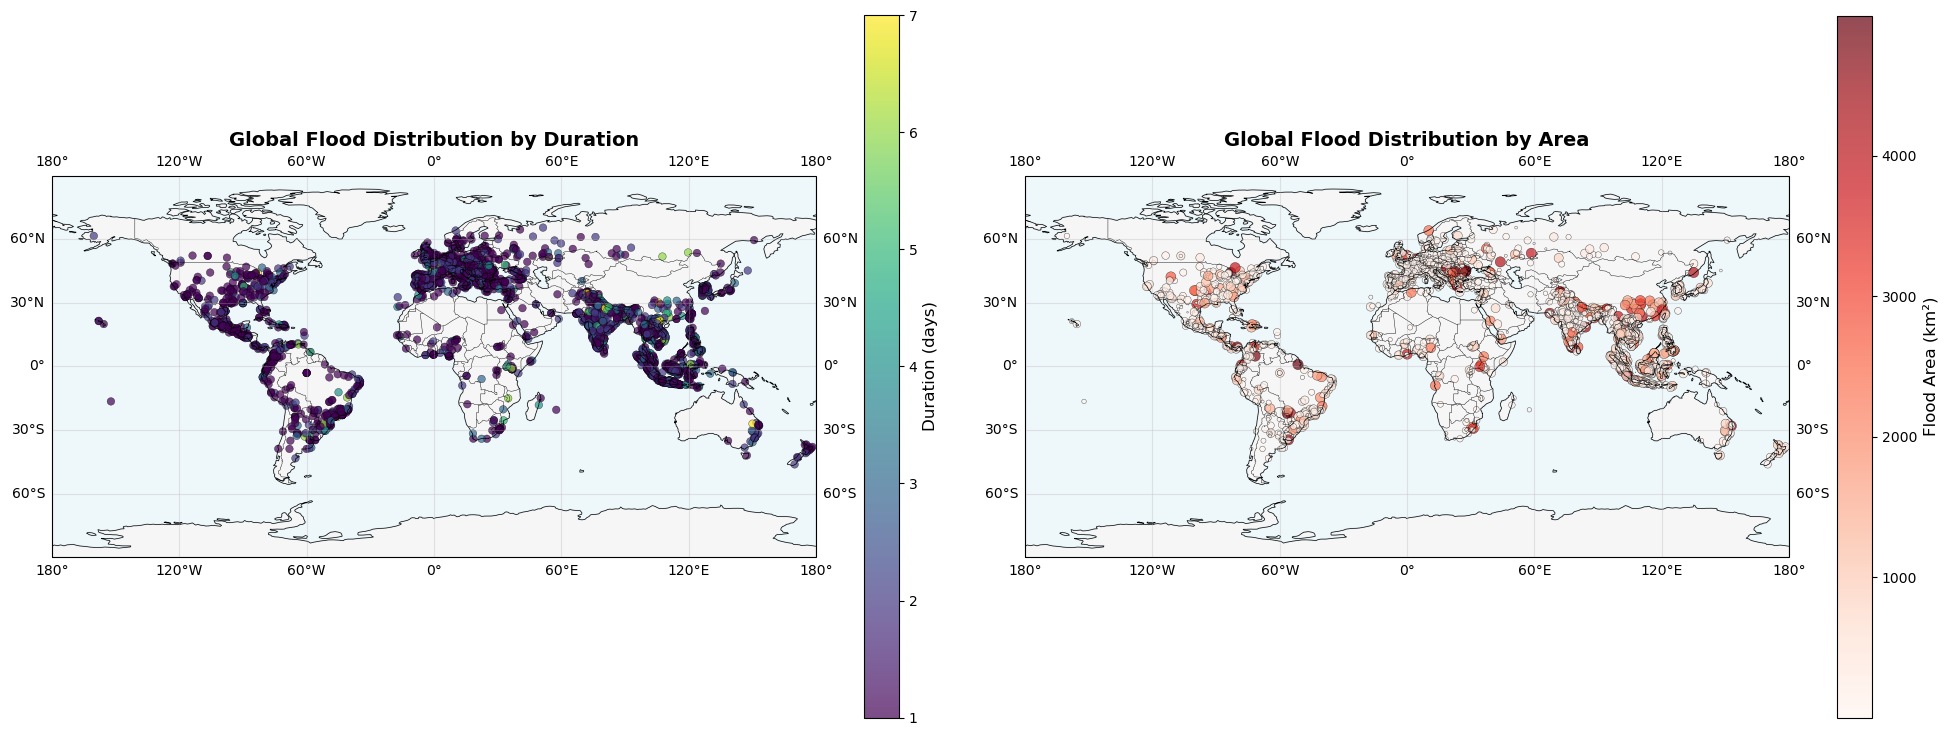

In [10]:
# Create global distribution maps
fig = plt.figure(figsize=(20, 12))

# Map 1: Distribution by duration
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_global()
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.add_feature(cfeature.BORDERS, linewidth=0.3)
ax1.add_feature(cfeature.LAND, alpha=0.2, color='lightgray')
ax1.add_feature(cfeature.OCEAN, alpha=0.2, color='lightblue')

scatter1 = ax1.scatter(lons, lats, c=durations, s=30, alpha=0.7, 
                      cmap='viridis', transform=ccrs.PlateCarree(), 
                      edgecolors='black', linewidth=0.3)
ax1.set_title('Global Flood Distribution by Duration', fontsize=14, fontweight='bold')
ax1.gridlines(draw_labels=True, alpha=0.3)

cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.6, pad=0.05)
cbar1.set_label('Duration (days)', fontsize=12)

# Map 2: Distribution by area
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_global()
ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax2.add_feature(cfeature.BORDERS, linewidth=0.3)
ax2.add_feature(cfeature.LAND, alpha=0.2, color='lightgray')
ax2.add_feature(cfeature.OCEAN, alpha=0.2, color='lightblue')

sizes = np.log10(areas_array + 1) * 15
scatter2 = ax2.scatter(lons, lats, c=areas_array, s=sizes, alpha=0.7, 
                      cmap='Reds', transform=ccrs.PlateCarree(),
                      edgecolors='black', linewidth=0.3)
ax2.set_title('Global Flood Distribution by Area', fontsize=14, fontweight='bold')
ax2.gridlines(draw_labels=True, alpha=0.3)

cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.6, pad=0.05)
cbar2.set_label('Flood Area (km²)', fontsize=12)

plt.tight_layout()
plt.show()

In [11]:
# Geographic statistics
print("Geographic Distribution Summary:")
print(f"Latitude range: {lats.min():.2f}° to {lats.max():.2f}°")
print(f"Longitude range: {lons.min():.2f}° to {lons.max():.2f}°")

# Hemisphere distribution
northern_hem = np.sum(lats > 0)
southern_hem = np.sum(lats <= 0)
eastern_hem = np.sum(lons > 0)  
western_hem = np.sum(lons <= 0)

print(f"\nHemisphere Distribution:")
print(f"Northern Hemisphere: {northern_hem:,} events ({northern_hem/len(lats)*100:.1f}%)")
print(f"Southern Hemisphere: {southern_hem:,} events ({southern_hem/len(lats)*100:.1f}%)")
print(f"Eastern Hemisphere: {eastern_hem:,} events ({eastern_hem/len(lons)*100:.1f}%)")
print(f"Western Hemisphere: {western_hem:,} events ({western_hem/len(lons)*100:.1f}%)")

# Continental approximation
continents = {
    'Europe': np.sum((lats > 35) & (lats < 72) & (lons > -10) & (lons < 40)),
    'Asia': np.sum((lats > 10) & (lats < 72) & (lons > 40) & (lons < 180)),
    'North America': np.sum((lats > 15) & (lats < 72) & (lons > -170) & (lons < -50)),
    'Africa': np.sum((lats > -35) & (lats < 35) & (lons > -20) & (lons < 55)),
    'South America': np.sum((lats > -55) & (lats < 15) & (lons > -85) & (lons < -35)),
    'Oceania': np.sum((lats > -50) & (lats < 0) & (lons > 110) & (lons < 180))
}

print(f"\nApproximate Continental Distribution:")
for continent, count in sorted(continents.items(), key=lambda x: x[1], reverse=True):
    if count > 0:
        print(f"{continent}: {count:,} events ({count/len(lats)*100:.1f}%)")

Geographic Distribution Summary:
Latitude range: -46.13° to 65.46°
Longitude range: -160.33° to 178.31°

Hemisphere Distribution:
Northern Hemisphere: 2,328 events (77.6%)
Southern Hemisphere: 672 events (22.4%)
Eastern Hemisphere: 2,204 events (73.5%)
Western Hemisphere: 796 events (26.5%)

Approximate Continental Distribution:
Europe: 884 events (29.5%)
Asia: 774 events (25.8%)
North America: 315 events (10.5%)
South America: 260 events (8.7%)
Oceania: 239 events (8.0%)
Africa: 120 events (4.0%)


## 8. Case Study: Detailed Event Analysis

In [26]:
# Simple Event Selection - Choose any event from 1 to 882,972

EVENT_NUMBER = 654165  # *** CHANGE THIS NUMBER ***

print(f"Analyzing event number {EVENT_NUMBER:,} out of {len(df):,} total events")
print("To analyze a different event, change EVENT_NUMBER above and re-run the cells below")
print("="*60)

# Get the selected event (convert from 1-based to 0-based index)
sample_event = df.iloc[EVENT_NUMBER - 1]

print("Case Study: Detailed Flood Event Analysis")

# Event details
start_date = datetime.fromtimestamp(sample_event['start_time'])
end_date = datetime.fromtimestamp(sample_event['end_time'])

print(f"Event ID: {sample_event['uuid']}")
print(f"Area: {sample_event['area_km2']:.2f} km²")
print(f"Duration: {sample_event['duration_days']} days")
print(f"Period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"Version: {sample_event['version']}")

# Parse geometry
geometry_wkt = sample_event['geometry_wkt']
geom = wkt.loads(geometry_wkt)
centroid = geom.centroid
center_lat, center_lon = centroid.y, centroid.x
bounds = geom.bounds

print(f"\nGeographic Information:")
print(f"Center: {center_lat:.4f}°N, {center_lon:.4f}°E")
print(f"Bounding box: {bounds}")
print(f"Geometry type: {geometry_wkt.split('(')[0]}")

# Statistical context
area_rank = (df['area_km2'] >= sample_event['area_km2']).sum()
area_percentile = (df['area_km2'] <= sample_event['area_km2']).sum() / len(df) * 100
duration_percentile = (df['duration_days'] <= sample_event['duration_days']).sum() / len(df) * 100

print(f"\nStatistical Context:")
print(f"Area rank: {area_rank:,} out of {len(df):,} events")
print(f"Area percentile: {area_percentile:.1f}%")
print(f"Duration percentile: {duration_percentile:.1f}%")

Analyzing event number 654,165 out of 882,972 total events
To analyze a different event, change EVENT_NUMBER above and re-run the cells below
Case Study: Detailed Flood Event Analysis
Event ID: c86f354ce8574b818207e0bf8917a519
Area: 4.88 km²
Duration: 2 days
Period: 2023-12-18 to 2023-12-19
Version: v3.1

Geographic Information:
Center: 7.2555°N, 80.3464°E
Bounding box: (80.332975, 7.2424698, 80.359583, 7.2644795)
Geometry type: POLYGON 

Statistical Context:
Area rank: 573,320 out of 882,972 events
Area percentile: 35.1%
Duration percentile: 83.8%


## 9. Flood Event Visualization

Creating flood event visualization...
Map bounds: 80.3130 to 80.3796 (W-E), 7.2225 to 7.2845 (S-N)
Padding used: 0.020° (≈2.2 km at equator)
Creating clean map background...
✓ Added OpenStreetMap satellite background
✓ Added country borders over satellite image
Added flood polygon with 5 vertices


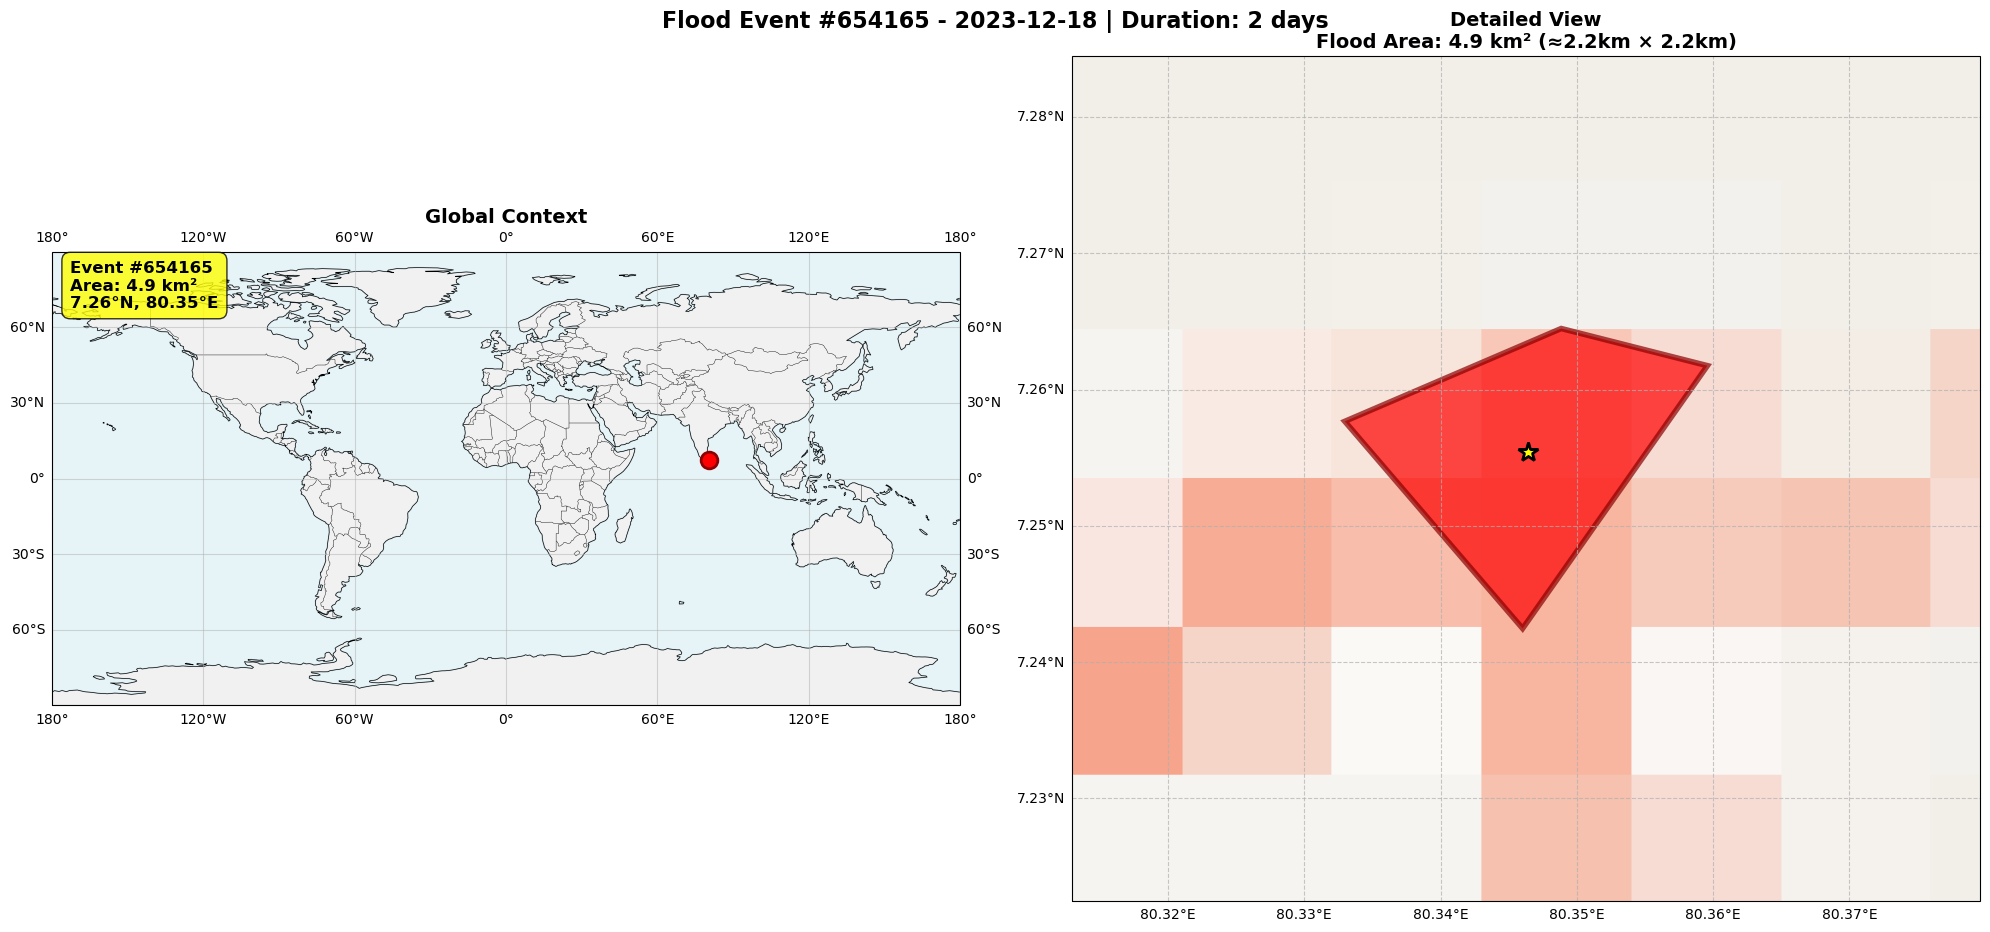


🗺️  MAP EXPLANATION:
📡 Background: OpenStreetMap satellite/terrain imagery
   (Shows real roads, buildings, terrain, vegetation)
🟦 Black lines: Country/administrative borders
🔴 RED POLYGON = The actual flood area
⭐ YELLOW STAR = Center point of flood
📐 Grid lines = Latitude/Longitude coordinates

📊 EVENT SUMMARY:
Event #654165 located at 7.255°N, 80.346°E
Flood covers 4.9 km² for 2 days
This event ranks in the 35.1th percentile by area


In [31]:
# Create dual map visualization: Global context + Local detail with satellite imagery
print("Creating flood event visualization...")

# Calculate map bounds for local view with more context
area_km2 = sample_event['area_km2']

# Adaptive padding based on flood size
if area_km2 < 1:      # Very small floods
    padding = 0.05    # ~5.5 km context
elif area_km2 < 10:   # Small floods  
    padding = 0.02    # ~2.2 km context
elif area_km2 < 100:  # Medium floods
    padding = 0.01    # ~1.1 km context
else:                 # Large floods
    padding = 0.005   # ~550 m context

local_west = bounds[0] - padding
local_east = bounds[2] + padding
local_south = bounds[1] - padding
local_north = bounds[3] + padding

print(f"Map bounds: {local_west:.4f} to {local_east:.4f} (W-E), {local_south:.4f} to {local_north:.4f} (S-N)")
print(f"Padding used: {padding:.3f}° (≈{padding*111:.1f} km at equator)")

# Create figure with two maps
fig = plt.figure(figsize=(20, 10))

# 1. GLOBAL CONTEXT MAP
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_global()

# Add world features
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.add_feature(cfeature.BORDERS, linewidth=0.3)
ax1.add_feature(cfeature.LAND, alpha=0.3, color='lightgray')
ax1.add_feature(cfeature.OCEAN, alpha=0.3, color='lightblue')

# Add the flood event as a red point on global map
ax1.plot(center_lon, center_lat, 'ro', markersize=12, 
         transform=ccrs.PlateCarree(), markerfacecolor='red', 
         markeredgecolor='darkred', markeredgewidth=2)

# Add text box with event info on global map
info_text = f"Event #{EVENT_NUMBER}\nArea: {sample_event['area_km2']:.1f} km²\n{center_lat:.2f}°N, {center_lon:.2f}°E"
ax1.text(0.02, 0.98, info_text, transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

ax1.gridlines(draw_labels=True, alpha=0.5)
ax1.set_title('Global Context', fontsize=14, fontweight='bold')

# 2. LOCAL DETAILED MAP WITH SATELLITE IMAGERY
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([local_west, local_east, local_south, local_north], crs=ccrs.PlateCarree())

# Create clean, simple background
print("Creating clean map background...")

# Try satellite imagery first - if available, use minimal overlays
satellite_loaded = False
try:
    import cartopy.io.img_tiles as cimgt
    imagery = cimgt.OSM()  # OpenStreetMap tiles
    ax2.add_image(imagery, 7)  # Good zoom level for context
    print("✓ Added OpenStreetMap satellite background")
    satellite_loaded = True
    
    # With satellite imagery, add minimal geographic features
    ax2.add_feature(cfeature.BORDERS, linewidth=2, alpha=0.8, color='black')
    print("✓ Added country borders over satellite image")
    
except Exception as e:
    print(f"⚠ Satellite imagery unavailable: {str(e)[:40]}...")
    satellite_loaded = False

# If no satellite imagery, create clear geographic map
if not satellite_loaded:
    print("Creating geographic map without satellite imagery...")
    ax2.add_feature(cfeature.LAND, alpha=0.9, color='wheat', edgecolor='brown', linewidth=1)
    ax2.add_feature(cfeature.OCEAN, alpha=0.9, color='lightblue', edgecolor='navy', linewidth=1)
    ax2.add_feature(cfeature.COASTLINE, linewidth=2, alpha=1, color='navy')
    ax2.add_feature(cfeature.BORDERS, linewidth=2, alpha=1, color='black')
    print("✓ Added clear geographic features (land=wheat, ocean=lightblue)")

# Add water features for better context
try:
    ax2.add_feature(cfeature.RIVERS, alpha=0.8, color='blue', linewidth=2)
    ax2.add_feature(cfeature.LAKES, alpha=0.8, color='blue')
except:
    pass  # Skip if features unavailable

# Add the flood polygon to the detailed map
try:
    if geometry_wkt.startswith('POLYGON'):
        coords_str = geometry_wkt.replace('POLYGON ((', '').replace('))', '')
        coord_pairs = [coord.strip().split() for coord in coords_str.split(',')]
        polygon_coords = [(float(pair[0]), float(pair[1])) for pair in coord_pairs if len(pair) == 2]
        
        # Create flood polygon with high visibility
        flood_polygon = MplPolygon(polygon_coords, closed=True, 
                                  facecolor='red', edgecolor='darkred', 
                                  alpha=0.7, linewidth=4,
                                  transform=ccrs.PlateCarree())
        ax2.add_patch(flood_polygon)
        print(f"Added flood polygon with {len(polygon_coords)} vertices")
        
    elif geometry_wkt.startswith('MULTIPOLYGON'):
        # Handle multi-polygon geometry
        geom = wkt.loads(geometry_wkt)
        for polygon in geom.geoms:
            coords = list(polygon.exterior.coords)
            flood_polygon = MplPolygon(coords, closed=True,
                                      facecolor='red', edgecolor='darkred',
                                      alpha=0.7, linewidth=4,
                                      transform=ccrs.PlateCarree())
            ax2.add_patch(flood_polygon)
        print(f"Added multi-polygon with {len(geom.geoms)} parts")
        
except Exception as e:
    print(f"Could not add flood polygon: {str(e)}")
    # Add fallback circle to show approximate location
    from matplotlib.patches import Circle
    circle = Circle((center_lon, center_lat), 0.001, 
                   facecolor='red', edgecolor='darkred', alpha=0.7,
                   transform=ccrs.PlateCarree())
    ax2.add_patch(circle)

# Add flood center point
ax2.plot(center_lon, center_lat, '*', markersize=15, 
         transform=ccrs.PlateCarree(), markerfacecolor='yellow', 
         markeredgecolor='black', markeredgewidth=2)

# Add gridlines and labels for detailed map
gl2 = ax2.gridlines(draw_labels=True, alpha=0.7, linestyle='--')
gl2.top_labels = False
gl2.right_labels = False

# Calculate approximate size for reference
approx_size = np.sqrt(sample_event['area_km2'])
ax2.set_title(f'Detailed View\nFlood Area: {sample_event["area_km2"]:.1f} km² (≈{approx_size:.1f}km × {approx_size:.1f}km)', 
              fontsize=14, fontweight='bold')

# Add overall title
fig.suptitle(f'Flood Event #{EVENT_NUMBER} - {start_date.strftime("%Y-%m-%d")} | Duration: {sample_event["duration_days"]} days',
             fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()

# Print event summary with map explanation
print(f"\n" + "="*60)
print(f"🗺️  MAP EXPLANATION:")
print(f"="*60)
if satellite_loaded:
    print(f"📡 Background: OpenStreetMap satellite/terrain imagery")
    print(f"   (Shows real roads, buildings, terrain, vegetation)")
    print(f"🟦 Black lines: Country/administrative borders")
else:
    print(f"🌍 Background: Simple geographic map")
    print(f"   🟫 Wheat color = Land areas") 
    print(f"   🟦 Light blue = Ocean/water bodies")
    print(f"   🟦 Navy lines = Coastlines")
    print(f"   ⚫ Black lines = Country borders")

print(f"🔴 RED POLYGON = The actual flood area")
print(f"⭐ YELLOW STAR = Center point of flood")
print(f"📐 Grid lines = Latitude/Longitude coordinates")

print(f"\n📊 EVENT SUMMARY:")
print(f"Event #{EVENT_NUMBER} located at {center_lat:.3f}°N, {center_lon:.3f}°E")
print(f"Flood covers {sample_event['area_km2']:.1f} km² for {sample_event['duration_days']} days")
print(f"This event ranks in the {area_percentile:.1f}th percentile by area")

## 10. Event Summary

In [28]:
# Selected Event Analysis Summary
print(f"Selected Event #{EVENT_NUMBER} - Complete Analysis")
print("="*60)

print(f"\nEvent Details:")
print(f"• UUID: {sample_event['uuid']}")
print(f"• Date: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"• Duration: {sample_event['duration_days']} days")
print(f"• Area: {sample_event['area_km2']:.2f} km²")
print(f"• Location: {center_lat:.4f}°N, {center_lon:.4f}°E")

print(f"\nStatistical Context:")
print(f"• Area rank: {area_rank:,} out of {len(df):,} total events")
print(f"• Area percentile: {area_percentile:.1f}% (larger than {area_percentile:.1f}% of all events)")
print(f"• Duration percentile: {duration_percentile:.1f}%")

print(f"\nGeographic Context:")
print(f"• Bounding box: {bounds}")
print(f"• Geometry type: {geometry_wkt.split('(')[0]}")

# Determine geographic region
if -180 <= center_lon <= -30:
    region = "Americas"
elif -30 < center_lon <= 60:
    if 35 <= center_lat <= 72:
        region = "Europe"
    elif -35 <= center_lat < 35:
        region = "Africa/Middle East"
    else:
        region = "Other"
elif 60 < center_lon <= 180:
    if center_lat > 10:
        region = "Asia"
    else:
        region = "Oceania"
else:
    region = "Unknown"

print(f"• Approximate region: {region}")

print(f"\nTo analyze a different event:")
print(f"• Change EVENT_NUMBER (currently {EVENT_NUMBER}) in the selection cell above")
print(f"• Choose any number from 1 to {len(df):,}")
print(f"• Re-run the analysis cells to see the new event")

Selected Event #654165 - Complete Analysis

Event Details:
• UUID: c86f354ce8574b818207e0bf8917a519
• Date: 2023-12-18 to 2023-12-19
• Duration: 2 days
• Area: 4.88 km²
• Location: 7.2555°N, 80.3464°E

Statistical Context:
• Area rank: 573,320 out of 882,972 total events
• Area percentile: 35.1% (larger than 35.1% of all events)
• Duration percentile: 83.8%

Geographic Context:
• Bounding box: (80.332975, 7.2424698, 80.359583, 7.2644795)
• Geometry type: POLYGON 
• Approximate region: Oceania

To analyze a different event:
• Change EVENT_NUMBER (currently 654165) in the selection cell above
• Choose any number from 1 to 882,972
• Re-run the analysis cells to see the new event


## 10. Summary for Selected Event

Based on the selected event (EVENT_NUMBER), this section provides a comprehensive summary of the flood characteristics and its global/local context.

In [24]:
# Event Summary Report
selected_event = df.iloc[EVENT_NUMBER-1]  # -1 because EVENT_NUMBER is 1-based

# Convert timestamps to readable dates
from datetime import datetime
start_date = datetime.fromtimestamp(selected_event['start_time'])
end_date = datetime.fromtimestamp(selected_event['end_time'])

print("=== CHRONICLE FLOOD EVENT ANALYSIS ===")
print(f"Event Number: {EVENT_NUMBER} (out of {len(df):,} total events)")
print(f"Event ID: {selected_event['uuid']}")
print(f"")
print("📅 TEMPORAL INFORMATION:")
print(f"   Start Date: {start_date.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"   End Date: {end_date.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"   Duration: {selected_event['duration_days']} days")
print(f"")
print("🌍 SPATIAL INFORMATION:")
print(f"   Area Affected: {selected_event['area_km2']:.2f} km²")
print(f"   Centroid: {center_lat:.4f}°N, {center_lon:.4f}°E")
print(f"   Continent: {continent}")
print(f"")
print("📊 COMPARATIVE ANALYSIS:")
print(f"   Area Rank: {area_rank:,} out of {len(df):,} events")
print(f"   Area Percentile: {area_percentile:.1f}% (larger than {area_percentile:.1f}% of all events)")
print(f"   Duration Percentile: {duration_percentile:.1f}%")
print(f"")
print("📍 NEAREST MAJOR CITY:")
print(f"   City: {city_name}")
print(f"   Distance: {nearest_distance:.1f} km from flood centroid")
print(f"   City Type: {city_type}")
print(f"")
print("🗺️ VISUALIZATION:")
print("   • Global map shows the event location in world context")
print("   • Local map provides detailed view with satellite imagery background")
print("   • Event polygon shows the exact affected area boundaries")
print(f"")
print("=" * 50)

=== CHRONICLE FLOOD EVENT ANALYSIS ===
Event Number: 700 (out of 882,972 total events)
Event ID: 199b9a48bbf34242b5724c264497a5d4

📅 TEMPORAL INFORMATION:
   Start Date: 2000-10-01 03:00:00
   End Date: 2000-10-01 03:00:00
   Duration: 1 days

🌍 SPATIAL INFORMATION:
   Area Affected: 1.76 km²
   Centroid: 50.1023°N, -5.5525°E
   Continent: Africa

📊 COMPARATIVE ANALYSIS:
   Area Rank: 702,739 out of 882,972 events
   Area Percentile: 20.4% (larger than 20.4% of all events)
   Duration Percentile: 58.5%

📍 NEAREST MAJOR CITY:


NameError: name 'city_name' is not defined